# Deep Learning Assignment 4

## Dreamy Pujara - 202211005


In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline
sns.set(style='whitegrid', palette='deep', font_scale=1.5)

In [ ]:
tf.keras.datasets.mnist.load_data(path="mnist.npz")

11490434/11490434 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
#Define input features and output
def x_y(df, target):
  return df.loc[:,df.columns!=target], df[target]

In [ ]:
#Train, Test & Validation split
def train_test_val_split(x, y):
  x1,x_test,y1, y_test = train_test_split(x , y, test_size = 0.2 , random_state = 40 )
  x_train, x_val, y_train, y_val = train_test_split(x1 , y1, test_size = 0.25 , random_state = 40 )
  return x_train, x_val, x_test, y_train, y_val , y_test

In [ ]:
#One Hot Encoding
def encode(x):
  enc = OneHotEncoder()
  return enc.fit_transform(np.array(x).reshape(-1,1)).toarray()

In [ ]:
#Scaling
def scale(x):
  sc = StandardScaler()
  return sc.fit_transform(x)

# Working on MNIST Dataset 

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(x_train[1])

In [ ]:
y_train[1]

0

0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
dtype: int64

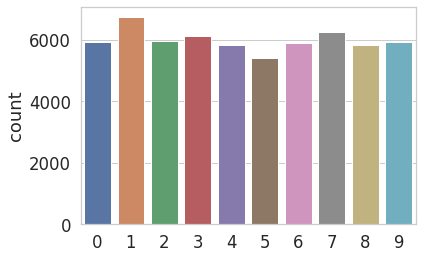

In [ ]:
g = sns.countplot(y_train)
pd.DataFrame(y_train).value_counts().sort_index()

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train , y_train, test_size = 0.25 , random_state = 40 )

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_val = x_val / 255.0

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
y_train=encode(y_train)
y_test=encode(y_test)
y_val=encode(y_val)

In [ ]:
model1 = Sequential()
model1.add(Flatten(input_shape=(28,28)))
model1.add(Dense(activation = "relu", units = 128, kernel_initializer = "uniform"))
model1.add(Dense(activation = "relu", units = 128, kernel_initializer = "uniform"))
model1.add(Dense(activation = "softmax", units = 10, kernel_initializer = "uniform"))
model1.compile(optimizer = 'adam' , loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [ ]:
history1 = model1.fit(x_train, y_train, validation_data = (x_val, y_val), epochs=10)

Epoch 1/10
1407/1407 [==============================] - 8s 5ms/step - loss: 0.3354 - accuracy: 0.9007 - val_loss: 0.1717 - val_accuracy: 0.9470
Epoch 2/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.1386 - accuracy: 0.9570 - val_loss: 0.1236 - val_accuracy: 0.9617
Epoch 3/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.0959 - accuracy: 0.9698 - val_loss: 0.1015 - val_accuracy: 0.9685
Epoch 4/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.0696 - accuracy: 0.9774 - val_loss: 0.1064 - val_accuracy: 0.9689
Epoch 5/10
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0547 - accuracy: 0.9824 - val_loss: 0.0961 - val_accuracy: 0.9723
Epoch 6/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0417 - accuracy: 0.9867 - val_loss: 0.0987 - val_accuracy: 0.9719
Epoch 7/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0355 - accuracy: 0.9876 - val_loss: 0.0964 - val_accuracy:

In [ ]:
loss1,acc1=model1.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1100 - accuracy: 0.9726


In [ ]:
print('Accuracy on test data: {} % \nLoss on test data: {}'.format(acc1*100, loss1)) 

Accuracy on test data: 97.2599983215332 % 
Loss on test data: 0.1099712997674942


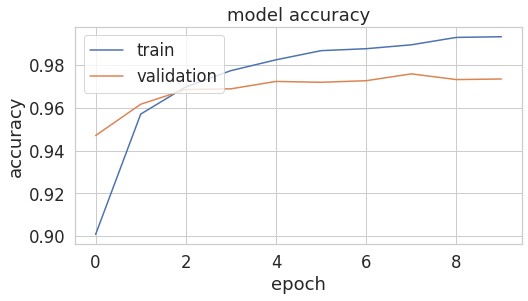

In [ ]:
rcParams['figure.figsize'] = 8, 4
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

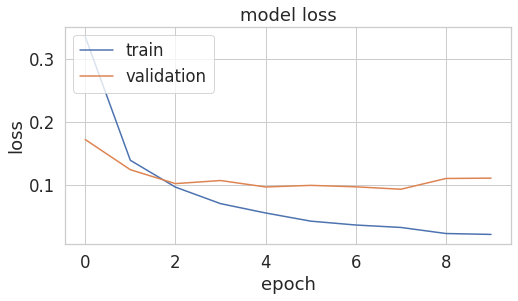

In [ ]:
rcParams['figure.figsize'] = 8, 4
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Working with Dogs vs Cats Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load csv file
def load(path):
  return pd.read_csv(path) 

In [ ]:
#Define input features and output
def x_y(df, target):
  return df.loc[:,df.columns!=target], df[target]

In [ ]:
#Train, Test & Validation split
def train_test_val_split(x, y):
  x1,x_test,y1, y_test = train_test_split(x , y, test_size = 0.2 , random_state = 40 )
  x_train, x_val, y_train, y_val = train_test_split(x1 , y1, test_size = 0.25 , random_state = 40 )
  return x_train, x_val, x_test, y_train, y_val , y_test

In [ ]:
#One Hot Encoding
def encode(x):
  enc = OneHotEncoder()
  return enc.fit_transform(np.array(x).reshape(-1,1)).toarray()

In [ ]:
#Scaling
def scale(x):
  sc = StandardScaler()
  return sc.fit_transform(x)

In [ ]:
filenames = load("/content/drive/MyDrive/datasets/sampleSubmission.csv")

In [ ]:
# Define COnstatnt
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [ ]:
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

NameError: ignored